<a href="https://colab.research.google.com/github/BitanHazra/projectRossman/blob/main/Copy_of_Yet_another_copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Project Summary -**

The objective of the Rossmann Sales Prediction project is to develop a predictive model that accurately forecasts daily sales for Rossmann stores. Accurate sales predictions can help in optimizing inventory management, staffing, and other operational aspects to enhance business efficiency and profitability.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

### Dataset Loading

In [ ]:
# Load Dataset
store_data = pd.read_csv('/content/sample_data/store.csv')
r_store_data = pd.read_csv('/content/sample_data/Rossmann Stores Data.csv')

<ipython-input-2-13456480d7ca>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  r_store_data = pd.read_csv('/content/sample_data/Rossmann Stores Data.csv')


### Dataset First View

In [ ]:
# Dataset First Look
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
r_store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
r_store_data[r_store_data['Open']==0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


Above we can see that there are so many stores which are closed we need to remove this store data as sales are also 0.

In [ ]:
r_store_data['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Numbers of rows in store data is {store_data.shape[0]} and columns is {store_data.shape[1]}')
print(f'Numbers of rows in Rossmann store data is {r_store_data.shape[0]} and columns is {r_store_data.shape[1]}')

Numbers of rows in store data is 1115 and columns is 10
Numbers of rows in Rossmann store data is 1017209 and columns is 9


### Dataset Information

In [ ]:
# Dataset Info
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
r_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'Dataset store duplicated values= {store_data.duplicated().sum()}')
print(f'Dataset Rossmann store Data duplicated values= {r_store_data.duplicated().sum()}')

Dataset store duplicated values= 0
Dataset Rossmann store Data duplicated values= 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
store_data.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
r_store_data.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

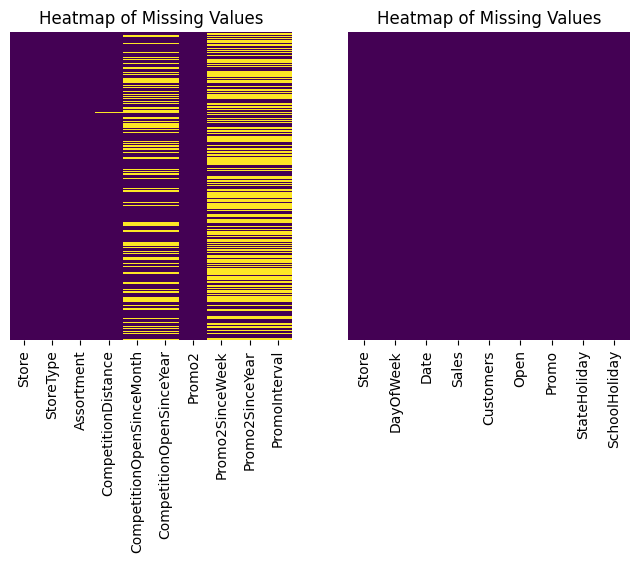

In [ ]:
# Visualizing the missing values
#Visualizing missing values in a dataset can help you understand the extent and pattern of the missing data.
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sb.heatmap(store_data.isna(),cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.subplot(1,2,2)
sb.heatmap(r_store_data.isna(),cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

### What did you know about your dataset?

We are having 2 tables Store table and Rossmann store data table.
Store table have data which affect the sales of store.
Rossmann store table having sales data of store.
Number of rows in store table are 1115 and having 10 columns.
Number of rows in Rossmann store data table are 1017209 and having 9 columns.
Store table having columns which have null values and data types used are int,object,float.
Rossmann store data table have no null values and data type used are int,object.
There are no duplicated values in both tables.
Store table column having maximum 544 null values from 1017209 values.
Rossmann store data table having no null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(store_data.columns)
print(r_store_data.columns)

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


In [ ]:
# Dataset Describe
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
r_store_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Variables Description



**Store**                     Store Number,
**StoreType**                 Type of Store,
**Assortment **               Mix of items retailer sale,
**CompetitionDistance**       Competative shop near to this shop,
**CompetitionOpenSinceMonth** Competative shop open month,
**CompetitionOpenSinceYear**  Competative shop open year,
**Promo2**                    Promotion held or not,
**Promo2SinceWeek **          Promotion started week,
**Promo2SinceYear**           Promotion started year,
**PromoInterval**             Promotion held on month,





**Store**         Type of Store,
**DayOfWeek**     Number of days in week shop opens,
**Date**          Sales value Date,
**Sales**         Sales at Date,
**Customers**     Number of customer,
**Open**          Whether shop open or close,
**Promo**         Promotion held or not,
**StateHoliday**  Whether state holiday or not,
**SchoolHoliday** Whether school holiday or not.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
store_data['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [ ]:
store_data['StoreType'].unique()


array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
store_data['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [ ]:
store_data['CompetitionDistance'].unique()


array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
       2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
       1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
       2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
       2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
       2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
       1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
       4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
       7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
       2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.750e+04,
       2.200e+03, 1.650e+03, 3.300e+02, 2.244e+04, 1.996e+04, 3.510e+03,
       3.320e+03, 7.910e+03, 2.370e+03, 2.239e+04, 2.710e+03, 1.181e+04,
       1.870e+03, 4.800e+02, 5.600e+02, 1.069e+04, 

In [ ]:
store_data['CompetitionOpenSinceMonth'].unique()


array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [ ]:
store_data['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [ ]:
store_data['Promo2'].unique()


array([0, 1])

In [ ]:
store_data['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [ ]:
store_data['Promo2SinceYear'].unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [ ]:
store_data['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
r_store_data['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [ ]:
r_store_data['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [ ]:
r_store_data['Sales'].unique()


array([ 5263,  6064,  8314, ...,   660, 17815, 23303])

In [ ]:
r_store_data['Customers'].unique()

array([ 555,  625,  821, ..., 3900,   36, 4065])

In [ ]:
r_store_data['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [ ]:
r_store_data['Open'].unique()


array([1, 0])

In [ ]:
r_store_data['Promo'].unique()

array([1, 0])

In [ ]:
r_store_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
r_store_data['SchoolHoliday'].unique()

array([1, 0])

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store








## 3. ***Data Wrangling***

# **Understand the Data**

In [ ]:
# knowing the data types
store_data.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [ ]:
# knowing the data types
r_store_data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [ ]:
# knowing the column names
store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# knowing the column names
r_store_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
print(store_data.isna().sum())
print('------'*20)
print(f'Percentage of missing values\n {store_data.isnull().mean()*100}')

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
------------------------------------------------------------------------------------------------------------------------
Percentage of missing values
 Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64


In [ ]:
print(r_store_data.isna().sum())
print('------'*20)
print(f'Percentage of missing values\n {r_store_data.isnull().mean()*100}')

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
------------------------------------------------------------------------------------------------------------------------
Percentage of missing values
 Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64


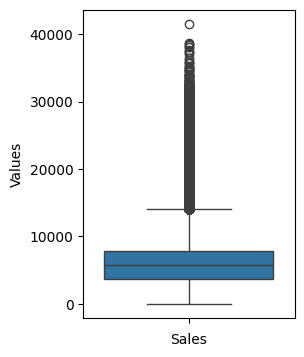

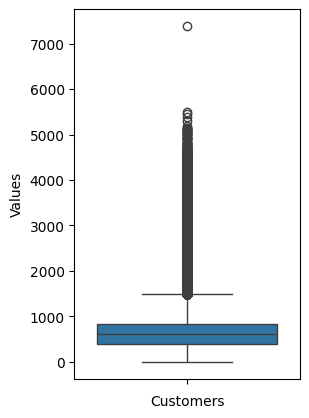

In [ ]:
plt.figure(figsize=(6,4))
for index, column in enumerate(r_store_data[['Sales','Customers']]):
  plt.subplot(1,2,index+1)
  sb.boxplot(r_store_data[column])
  plt.xlabel(column)
  plt.ylabel('Values')
  plt.show()

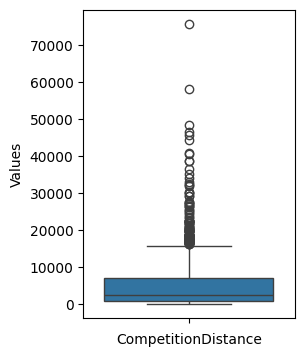

In [ ]:
plt.figure(figsize=(6,4))
for index, column in enumerate(store_data[['CompetitionDistance']]):
  plt.subplot(1,2,index+1)
  sb.boxplot(store_data[column])
  plt.xlabel(column)
  plt.ylabel('Values')
  plt.show()

# **Data conversion**

In [ ]:
r_store_data['StateHoliday'].replace(0,'0',inplace=True)
r_store_data['Date'] = pd.to_datetime(r_store_data['Date'])
r_store_data['Year'] =  r_store_data['Date'].dt.year
r_store_data['month'] =  r_store_data['Date'].dt.month
r_store_data = r_store_data[r_store_data['Open']==1]
r_store_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,month
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7
...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,2013,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,2013,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,2013,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,2013,1


In [ ]:
#merge table
merge_df = pd.merge(r_store_data,store_data,how='left',on='Store')
merge_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,1,0,a,1,2013,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
844388,733,2,2013-01-01,10765,2377,1,0,a,1,2013,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
844389,769,2,2013-01-01,5035,1248,1,0,a,1,2013,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,1,0,a,1,2013,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

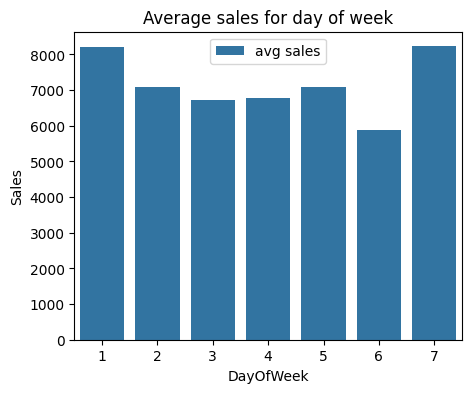

In [ ]:
# Chart - 1 visualization code
avg_dayofweek_sales = r_store_data.groupby(['DayOfWeek'])['Sales'].mean().reset_index()
plt.figure(figsize=(5,4))
sb.barplot(x='DayOfWeek',y='Sales',data=avg_dayofweek_sales,label='avg sales')
plt.title('Average sales for day of week')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

**Sales Variation Across Days:**

**High Sales Days:**  Saturday and Sunday have higher bars, it indicates that weekends drive more sales. This is common in retail due to increased shopping activity on non-working days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Implementing programs or special events on midweek days (like Friday) can maintain and potentially increase customer engagement, enhancing customer retention.

Answer Here

#### Chart - 2

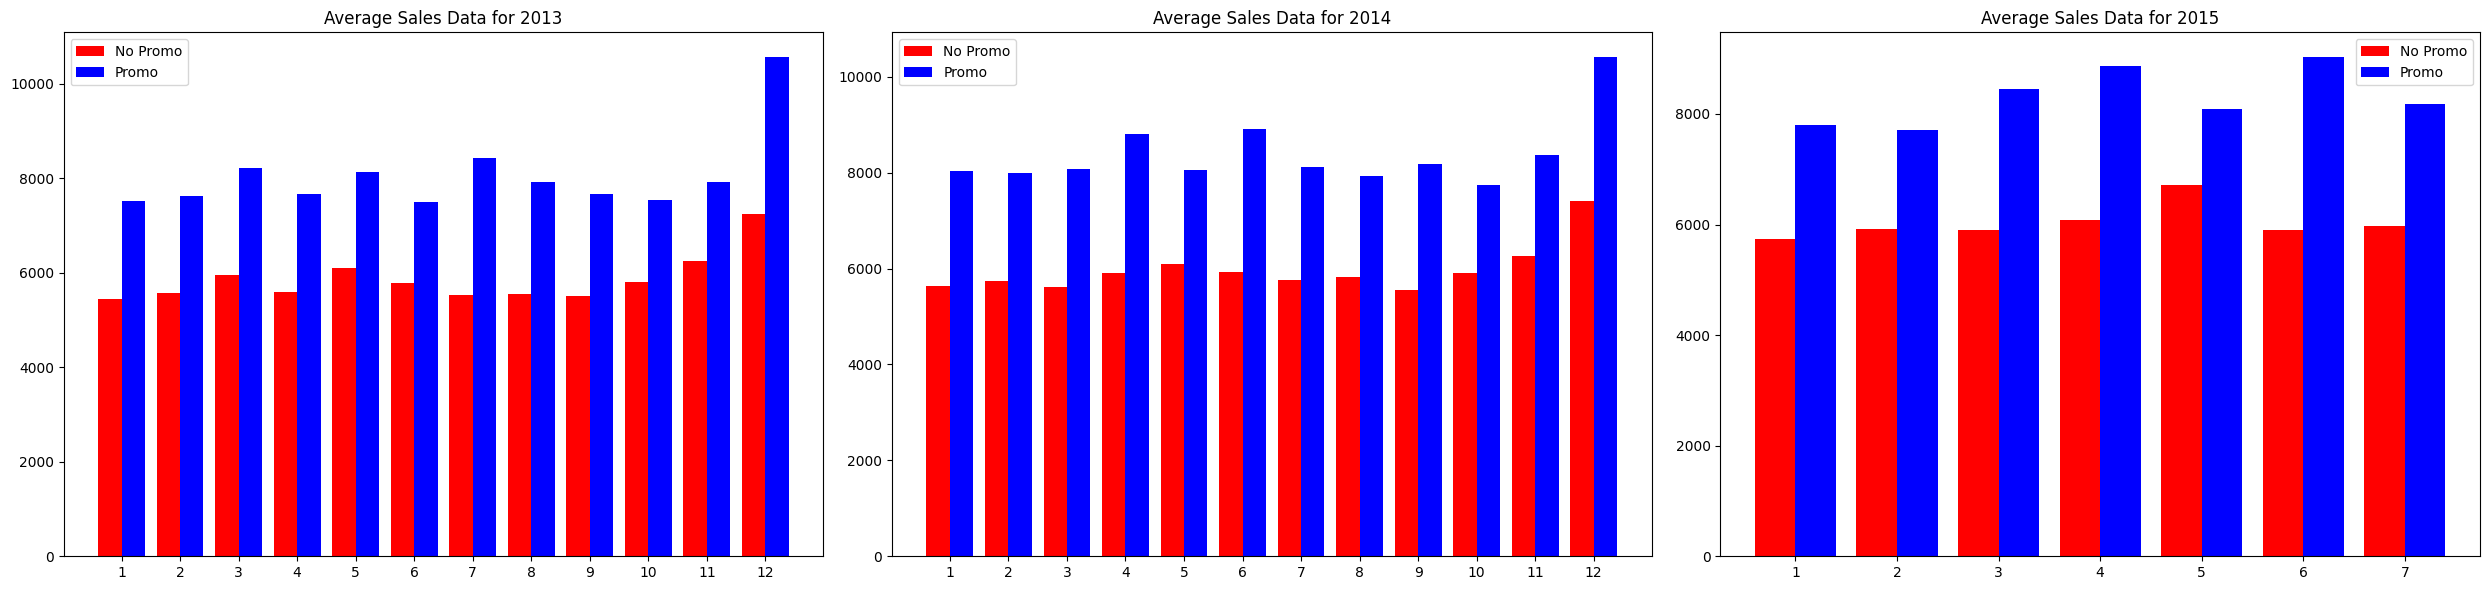

In [ ]:
# Chart - 2 visualization code Sales	Promo	StateHoliday	SchoolHoliday	Year	month
promo_data = r_store_data[r_store_data['Promo'] == 1]
promo_data = promo_data.groupby(['Year', 'month'])['Sales'].mean().reset_index()
no_promo_data = r_store_data[r_store_data['Promo'] == 0]
no_promo_data = no_promo_data.groupby(['Year', 'month'])['Sales'].mean().reset_index()

plt.figure(figsize=(25, 6))

unique_years = no_promo_data['Year'].unique()

for index, year in enumerate(unique_years):
    filtered_no_promo = no_promo_data[no_promo_data['Year'] == year]
    filtered_promo = promo_data[promo_data['Year'] == year]

    ax = plt.subplot(1, len(unique_years), index + 1)

    # Set the positions of the bars
    bar_width = 0.4
    months = filtered_no_promo['month']
    no_promo_positions = range(len(months))
    promo_positions = [x + bar_width for x in no_promo_positions]

    # Plot the no promotion data
    ax.bar(no_promo_positions, filtered_no_promo['Sales'], width=bar_width, color='red', label='No Promo')

    # Plot the promotion data
    ax.bar(promo_positions, filtered_promo['Sales'], width=bar_width, color='blue', label='Promo')

    # Set the x-axis labels to be the month names
    ax.set_xticks([r + bar_width / 2 for r in no_promo_positions])
    ax.set_xticklabels(months)

    ax.set_title(f"Average Sales Data for {year}")
    ax.legend()

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

**Sales Variation Across Months in every year including promotion and without promotion:**

As we can identify that when there is no promotion there is a decrease in the sales and when there is a promotion there is increase in sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

From above we can find that if we increase the number of promotion in each month then we can improve the average sales of each month.

#### Chart - 3

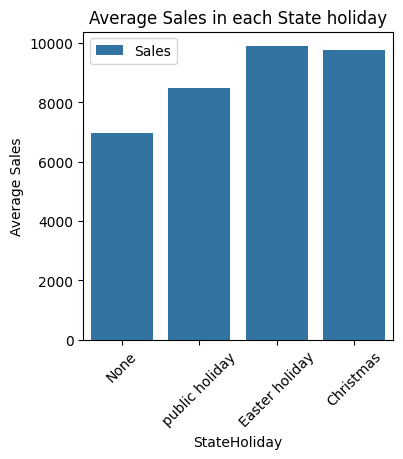

In [ ]:
# Chart - 3 visualization code
state_holiday = r_store_data.groupby(['StateHoliday'])['Sales'].mean().reset_index()
state_holiday['StateHoliday'].replace({'0':'None','a':'public holiday','b':'Easter holiday','c':'Christmas'},inplace=True)
plt.figure(figsize=(4,4))
sb.barplot(x='StateHoliday',y='Sales',data=state_holiday,label='Sales')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('Average Sales')
plt.title('Average Sales in each State holiday')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

**Average sales on State Holiday** In Easter and Christmas holiday average sales of the Stores are maximus but when there is none then sales is very low.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

when there is public holiday their is also a school hoilday we can increase the sales by attracting student or by doing promotion.

#### Chart - 4

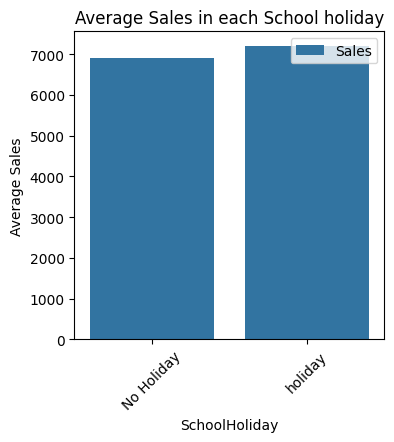

In [ ]:
# Chart - 4 visualization code
school_holiday = r_store_data.groupby(['SchoolHoliday'])['Sales'].mean().reset_index()
school_holiday['SchoolHoliday'].replace({0:'No Holiday',1:'holiday'},inplace=True)
plt.figure(figsize=(4,4))
sb.barplot(x='SchoolHoliday',y='Sales',data=school_holiday,label='Sales')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('Average Sales')
plt.title('Average Sales in each School holiday')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent

##### 2. What is/are the insight(s) found from the chart?

Answer Here

There is no such big difference in the sale when there is a school holiday or no holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

By adding some promotion a the time of no holiday we can increase the sales.

#### Chart - 5

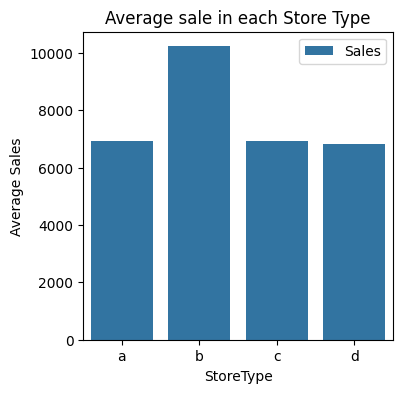

In [ ]:
# Chart - 5 visualization code
storeType = merge_df.groupby(['StoreType'])['Sales'].mean().reset_index()
plt.figure(figsize=(4,4))
sb.barplot(x='StoreType',y='Sales',data=storeType,label='Sales')
plt.legend()
plt.ylabel('Average Sales')
plt.title('Average sale in each Store Type')
plt.show()

##### 1. Why did you pick the specific chart?

*Answer* Here.

Bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Store type b having the maximum sales and other store not having much sales as compared to store b.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

By adding some promotion a the time of no holiday we can increase the sales.

#### Chart - 6

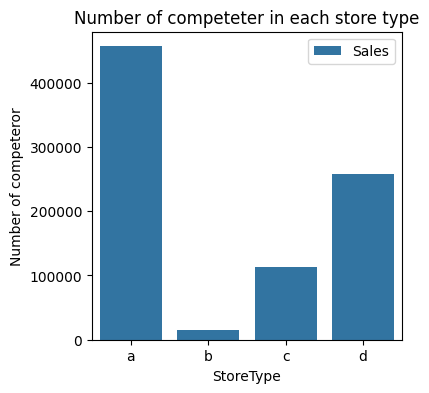

In [ ]:
# Chart - 6 visualization code
count_comp = merge_df.groupby(['StoreType'])['CompetitionDistance'].count().reset_index()
plt.figure(figsize=(4,4))
sb.barplot(x='StoreType',y='CompetitionDistance',data=count_comp,label='Sales')
plt.legend()
plt.ylabel('Number of competeror')
plt.title('Number of competeter in each store type')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

*Answer* Here

Store type a having maximum competitor and store type b having lowest competitor.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

As by seeing the number of competitor we have to focus more on stores which having maximum competitor so that sales do not get affected.

#### Chart - 7

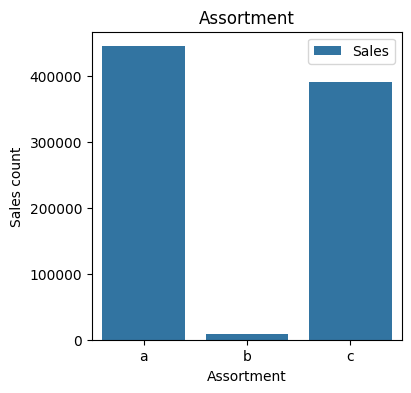

In [ ]:
# Chart - 7 visualization code
count_comp = merge_df.groupby(['Assortment'])['Sales'].count().reset_index()
plt.figure(figsize=(4,4))
sb.barplot(x='Assortment',y='Sales',data=count_comp,label='Sales')
plt.legend()
plt.ylabel('Sales count')
plt.title('Assortment')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Store having assortment **a** means basic having maximum sales compared to other but store having assortment **b** having minimum sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

As by seeing it we got to knew that assortment a having much demand so we can put those in assortment so that it can increse the sales.

#### Chart - 8

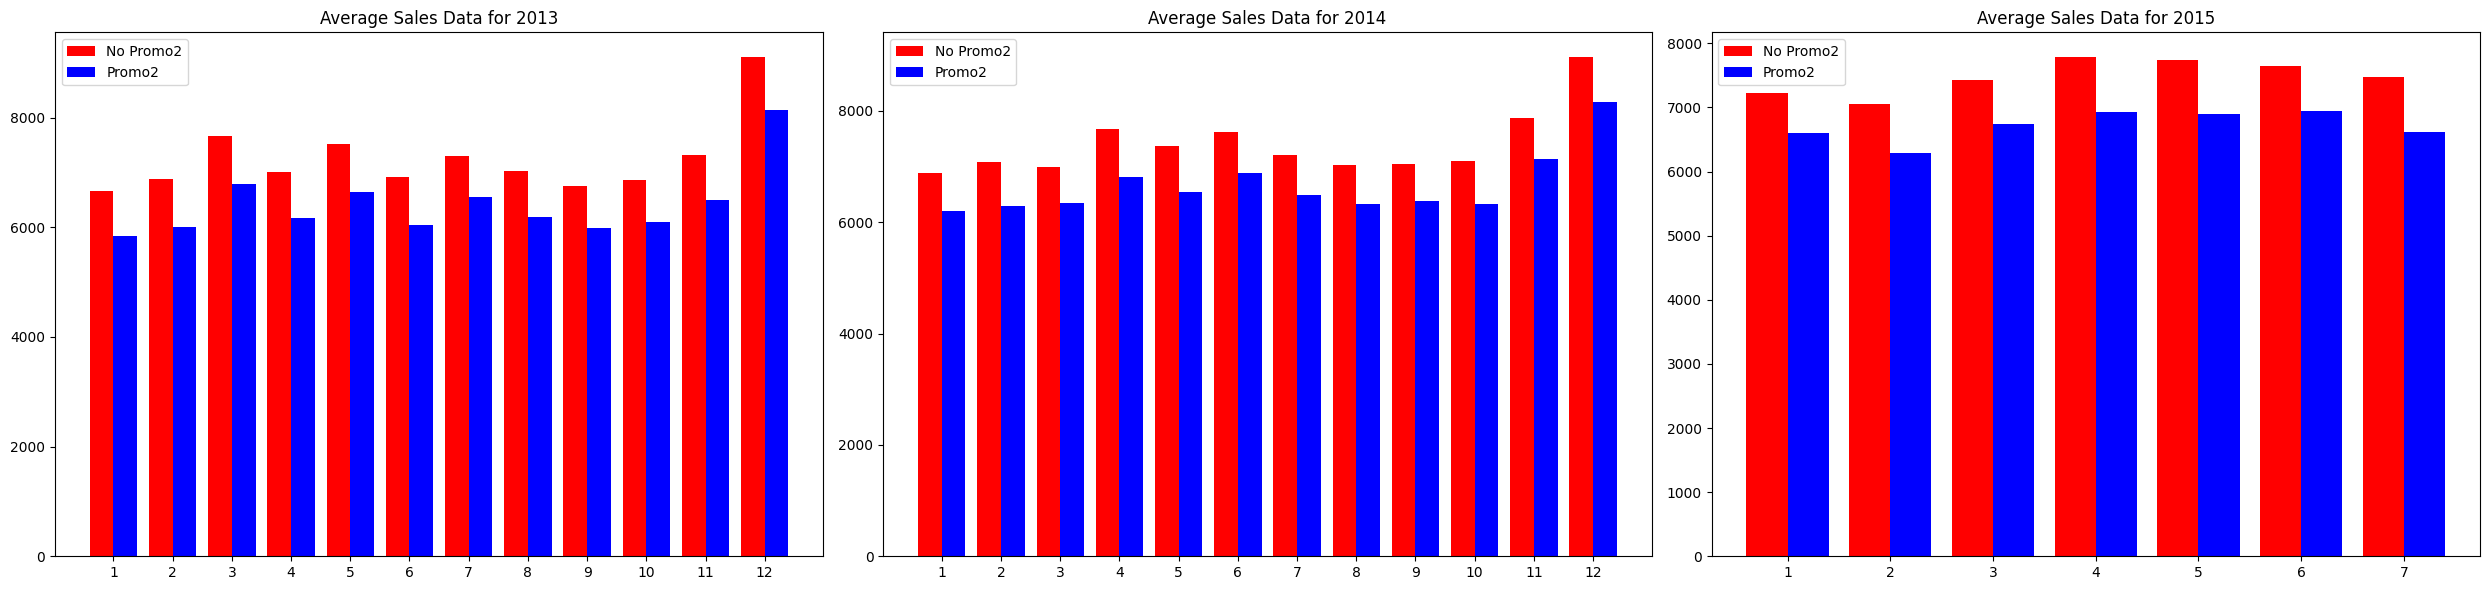

In [ ]:
# Chart - 8 visualization code
promo_data = merge_df[merge_df['Promo2'] == 1]
promo_data = promo_data.groupby(['Year', 'month'])['Sales'].mean().reset_index()
no_promo_data = merge_df[merge_df['Promo2'] == 0]
no_promo_data = no_promo_data.groupby(['Year', 'month'])['Sales'].mean().reset_index()

plt.figure(figsize=(25, 6))

unique_years = no_promo_data['Year'].unique()

for index, year in enumerate(unique_years):
    filtered_no_promo = no_promo_data[no_promo_data['Year'] == year]
    filtered_promo = promo_data[promo_data['Year'] == year]

    ax = plt.subplot(1, len(unique_years), index + 1)

    # Set the positions of the bars
    bar_width = 0.4
    months = filtered_no_promo['month']
    no_promo_positions = range(len(months))
    promo_positions = [x + bar_width for x in no_promo_positions]

    # Plot the no promotion data
    ax.bar(no_promo_positions, filtered_no_promo['Sales'], width=bar_width, color='red', label='No Promo2')

    # Plot the promotion data
    ax.bar(promo_positions, filtered_promo['Sales'], width=bar_width, color='blue', label='Promo2')

    # Set the x-axis labels to be the month names
    ax.set_xticks([r + bar_width / 2 for r in no_promo_positions])
    ax.set_xticklabels(months)

    ax.set_title(f"Average Sales Data for {year}")
    ax.legend()

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

**Sales Variation Across Months in every year including promotion2 and without promotion2:**

As we can identify that when there is promotion2 there is a decrease in the sales and when there is no promotion2 there is increase in sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

As we can see promo2 is not increasing the sales so it is not affective for our store.

#### Chart - 9

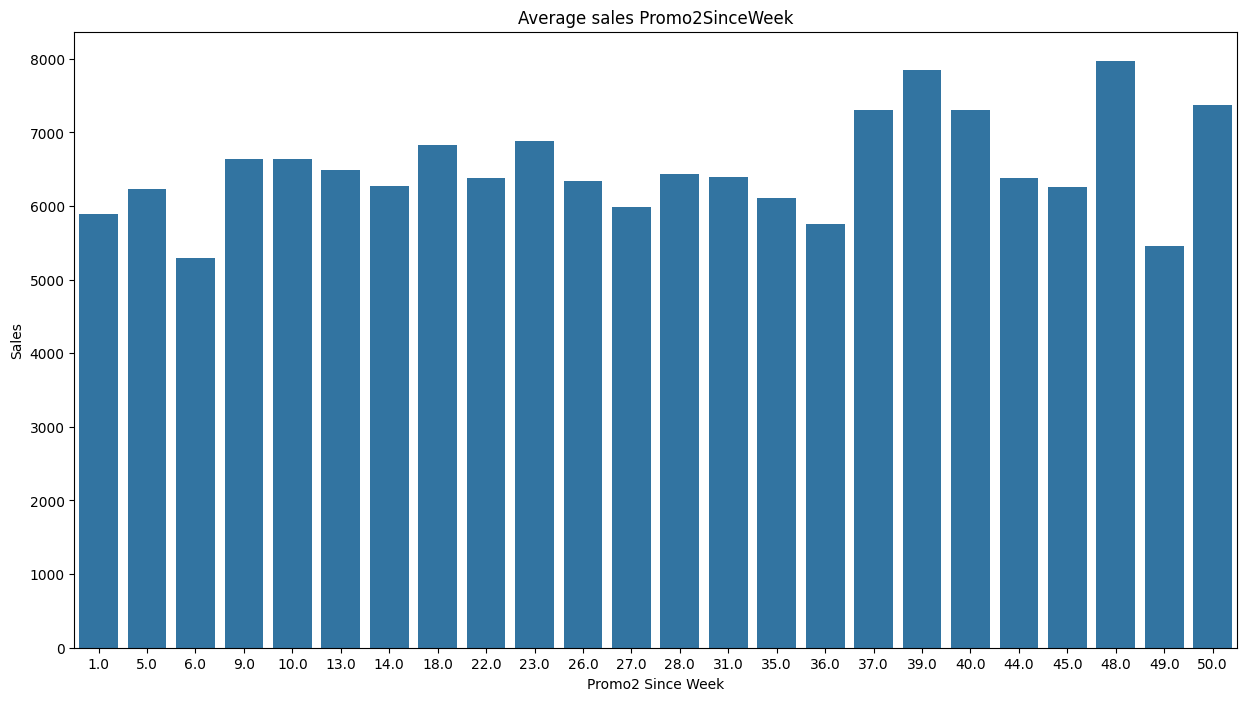

In [ ]:
# Chart - 9 visualization code
mean_sales_promo2 = merge_df.groupby(['Promo2SinceWeek'])['Sales'].mean().reset_index()
plt.figure(figsize=(15,8))
sb.barplot(x='Promo2SinceWeek',y='Sales',data=mean_sales_promo2)
plt.title('Average sales Promo2SinceWeek')
plt.xlabel('Promo2 Since Week')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Promo2 for longer duration or for shorter duration sales are same there is no such big difference in sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Promo2 is not affective to increase sales.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
#corr_metrix = merge_df.corr()
#plt.figure(figsize=(18,11))
#sb.heatmap(corr_metrix,annot=True,cmap='coolwarm',linewidths=0.5)
#plt.title('Correlation Heatmap')
#plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [1]:
# Pair Plot visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

**Null Hypothesis (H0)**: There is no significant difference in sales between stores with longer promotion durations and those with shorter promotion durations.

**Alternative Hypothesis (H1):** Stores with longer promotion durations have significantly higher sales than those with shorter promotion durations.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy import stats

median_promo_duration = merge_df['Promo2SinceWeek'].median()

# Subset data
long_promo_sales = merge_df[merge_df['Promo2SinceWeek'] > median_promo_duration]['Sales']
short_promo_sales = merge_df[merge_df['Promo2SinceWeek'] <= median_promo_duration]['Sales']

# Calculate means and standard deviations
long_promo_mean = long_promo_sales.mean()
short_promo_mean = short_promo_sales.mean()
long_promo_std = long_promo_sales.std()
short_promo_std = short_promo_sales.std()

# Sample sizes
n_long_promo = len(long_promo_sales)
n_short_promo = len(short_promo_sales)

# Calculate the z-statistic
z_stat = (long_promo_mean - short_promo_mean) / np.sqrt((long_promo_std**2 / n_long_promo) + (short_promo_std**2 / n_short_promo))

# Calculate the p-value for a one-tailed test
p_value = 1 - stats.norm.cdf(z_stat)

# Print results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Z-statistic: 47.96618269018171
P-value: 0.0
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
Here we have choosen Z-test.

##### Why did you choose the specific statistical test?

Answer Here.
 As our sample size is greater than 30.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

**Null Hypothesis (H0):** Stores with higher sales have no significant difference in competitor presence compared to stores with lower sales.

**Alternative Hypothesis (H1):** Stores with higher sales have significantly different competitor presence compared to stores with lower sales.


#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy import stats

median_sales = merge_df['Sales'].median()

# Subset data
high_sales_competitors = merge_df[merge_df['Sales'] > median_sales]['CompetitionDistance']
low_sales_competitors = merge_df[merge_df['Sales'] <= median_sales]['CompetitionDistance']

# Calculate means and standard deviations
high_sales_mean = high_sales_competitors.mean()
low_sales_mean = low_sales_competitors.mean()
high_sales_std = high_sales_competitors.std()
low_sales_std = low_sales_competitors.std()

# Sample sizes
n_high_sales = len(high_sales_competitors)
n_low_sales = len(low_sales_competitors)

# Calculate the z-statistic
z_stat = (high_sales_mean - low_sales_mean) / np.sqrt((high_sales_std**2 / n_high_sales) + (low_sales_std**2 / n_low_sales))

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Print results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Z-statistic: -5.860979059129233
P-value: 4.601460101838484e-09
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
Here we have choosen Z-test.

##### Why did you choose the specific statistical test?

Answer Here.
As our sample size is greater than 30.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

**Null Hypothesis (H0):** There is no significant difference in sales between stores with a larger assortment of products and those with a smaller assortment.

**Alternative Hypothesis (H1):** Stores with a larger assortment of products have significantly different sales compared to those with a smaller assortment.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy import stats

# Subset data
high_sales = merge_df[merge_df['StoreType'] == 'a']['Sales']
low_sales = merge_df[merge_df['StoreType'] == 'b']['Sales']

# Calculate means and standard deviations
high_sales_mean = high_sales.mean()
low_sales_mean = low_sales.mean()
high_sales_std = high_sales.std()
low_sales_std = low_sales.std()

# Sample sizes
n_high_sales = len(high_sales)
n_low_sales = len(low_sales)

# Calculate the z-statistic
z_stat = (high_sales_mean - low_sales_mean) / np.sqrt((high_sales_std**2 / n_high_sales) + (low_sales_std**2 / n_low_sales))

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Print results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Z-statistic: -79.43309988896843
P-value: 0.0
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Answer Here.
Here we have choosen Z-test.

##### Why did you choose the specific statistical test?

Answer Here.
As our sample size is greater than 30.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
merge_df['Promo2SinceWeek'].fillna(0,inplace=True)
merge_df['Promo2SinceYear'].fillna(0,inplace=True)
merge_df['PromoInterval'].fillna(0,inplace=True)

In [ ]:
merge_df['CompetitionDistance'].fillna(0,inplace=True)
merge_df[merge_df['CompetitionDistance']==0][['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].fillna(0,inplace=True)
merge_df['CompetitionOpenSinceMonth'].fillna(merge_df['CompetitionOpenSinceMonth'].mean(),inplace=True)
merge_df['CompetitionOpenSinceYear'].fillna(merge_df['CompetitionOpenSinceYear'].mean(),inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

**Promo2SinceWeek** , **Promo2SinceYear** , **PromoInterval**:Missing values are filled with 0. We cannot fill Nan values with mean or standard deviation as it can effect our result. Promo directly affect our sales data so it better to fill it with 0.

**CompetitionOpenSinceMonth','CompetitionOpenSinceYear**:Store whose CompetitionDistance is 0 we fill Nan values with 0 as if there is no competetor means no month value and no year value.

**CompetitionOpenSinceMonth','CompetitionOpenSinceYear**: Store whose CompetitionDistance is not 0 we fill Nan values with mean as there is a competition but forget to inset the values.





### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

**Customer,Sales and distance**: These features are having outliers but we will not handle it because in a shop customer may increase some day or may decrease some day so it may have outliers same as sales and distance.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
merge_df['StateHoliday'] = merge_df['StateHoliday'].map({'0':0,'a':1,'b':2,'c':3})
merge_df['StoreType'] = merge_df['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
merge_df['Assortment'] = merge_df['Assortment'].map({'a':1,'b':2,'c':3})
merge_df['PromoInterval'] = merge_df['PromoInterval'].map({0:0, 'Jan,Apr,Jul,Oct':1, 'Feb,May,Aug,Nov':2, 'Mar,Jun,Sept,Dec':3})

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

**StateHoliday, StoreType, Assortment, PromoInterval :**This columns values are code with 0,1,2,3.



### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
merge_df.drop(columns=['Promo2', 'Promo2SinceWeek', 'CompetitionDistance', 'CompetitionOpenSinceMonth'], inplace=True)
merge_df['day'] = merge_df['Date'].dt.day
merge_df.drop(columns=['Date'], inplace=True)

##### What all feature selection methods have you used  and why?

Answer Here.
Correlation Coefficient: method have been used for features selection to avoid overfitting


##### Which all features you found important and why?

Answer Here.

**Promo2', 'Promo2SinceWeek', 'CompetitionDistance', 'CompetitionOpenSinceMonth**
This features are not so important as it not affect sales directly.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
merge_df['CompetitionOpenSinceYear'] = merge_df['CompetitionOpenSinceYear'].astype('int64')
merge_df['Promo2SinceYear'] = merge_df['Promo2SinceYear'].astype('int64')
from scipy import stats
merge_df['Sales_log'],_ = stats.boxcox(merge_df['Sales']+1)
merge_df['Customers_log'],_ = stats.boxcox(merge_df['Customers']+1)
merge_df.drop(columns=['Sales','Customers'],inplace=True)
merge_df.drop(columns=['Year'],inplace=True)
merge_df.drop(columns=['Open'],inplace=True)
merge_df

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,month,StoreType,Assortment,CompetitionOpenSinceYear,Promo2SinceYear,PromoInterval,day,Sales_log,Customers_log
0,1,5,1,0,1,7,3,1,2008,0,0,31,17.687955,5.731085
1,2,5,1,0,1,7,1,1,2007,2010,1,31,18.217987,5.828070
2,3,5,1,0,1,7,1,1,2006,2011,1,31,19.440739,6.049484
3,4,5,1,0,1,7,3,3,2009,0,0,31,21.592070,6.531191
4,5,5,1,0,1,7,1,1,2015,0,0,31,17.366230,5.736958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,0,1,1,1,2,1,2006,0,0,1,16.098208,5.747133
844388,733,2,0,1,1,1,2,2,1999,0,0,1,20.486664,6.895028
844389,769,2,0,1,1,1,2,2,2008,2012,1,1,17.524601,6.385869
844390,948,2,0,1,1,1,2,2,2008,0,0,1,17.107946,6.239173


##### Which method have you used to scale you data and why?

As our data are right skewed so we use boxcox as it giving result closed to 0.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
X = merge_df.drop(columns=['Sales_log'])
Y = merge_df['Sales_log']
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2,random_state=42)

### ML Model - 1

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,mean_absolute_error
l_model = LinearRegression()
l_model.fit(train_x,train_y)
pred_y = l_model.predict(test_x)
mse = mean_squared_error(test_y, pred_y)

r2 = r2_score(test_y, pred_y)

mae = mean_absolute_error(test_y, pred_y)

rmse = np.sqrt(mse)

print(f'Mean Squared Error for LinearRegression is {mse}')
print(f'R-squared for LinearRegression is {r2}')
print(f'Mean Absolute Error for LinearRegression is {mae}')
print(f'Root Mean Squared Error for LinearRegression is {rmse}')


Mean Squared Error for LinearRegression is 0.4917223200877563
R-squared for LinearRegression is 0.8149200771746692
Mean Absolute Error for LinearRegression is 0.5444155725304757
Root Mean Squared Error for LinearRegression is 0.7012291494852138


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression is a supervised machine learning algorithm used for predicting a continuous target variable based on one or more predictor variables. The goal of linear regression is to find the linear relationship between the features (independent variables) and the target (dependent variable).

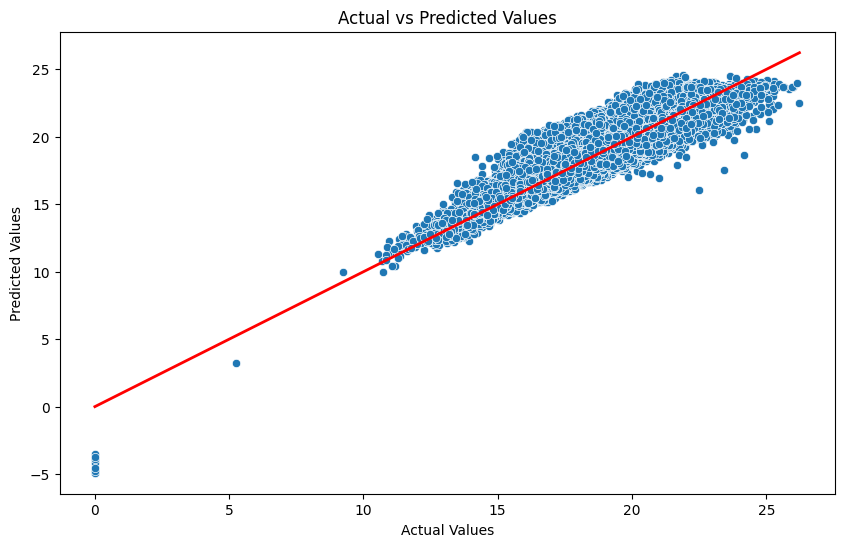

In [ ]:
results_df = pd.DataFrame({'Actual': test_y, 'Predicted': pred_y})

plt.figure(figsize=(10, 6))

sb.scatterplot(x='Actual', y='Predicted', data=results_df)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         color='red', lw=2)

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

l_model = LinearRegression()

k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)

cv_results = cross_val_score(l_model, X, Y, cv=kf, scoring='r2')

print(f'Cross-Validation R-squared scores: {cv_results}')
print(f'Mean R-squared: {cv_results.mean()}')
print(f'Standard Deviation of R-squared: {cv_results.std()}')

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X, Y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Hyperparameters: {best_params}')
print(f'Best R-squared Score: {best_score}')



Cross-Validation R-squared scores: [0.81492008 0.81502793 0.81630655 0.81536296 0.81408888]
Mean R-squared: 0.8151412777865286
Standard Deviation of R-squared: 0.0007178178951350268


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_x,train_y)
pred_y = rf_model.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)
mae = mean_absolute_error(test_y, pred_y)
rmse = np.sqrt(mse)

print(f'Mean Squared Error for Random Forest Regressor is {mse}')
print(f'R-squared for Random Forest Regressor is {r2}')
print(f'Mean Absolute Error for Random Forest Regressor is {mae}')
print(f'Root Mean Squared Error for Random Forest Regressor is {rmse}')


Mean Squared Error for Random Forest Regressor is 0.07081097203680194
R-squared for Random Forest Regressor is 0.9733473777691868
Mean Absolute Error for Random Forest Regressor is 0.19732675531167954
Root Mean Squared Error for Random Forest Regressor is 0.26610331083397276


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(train_x, train_y)

pred_y = dt_model.predict(test_x)

mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)
mae = mean_absolute_error(test_y, pred_y)
rmse = mean_squared_error(test_y, pred_y, squared=False)


print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Squared Error (MSE): 0.14
R-squared (R2): 0.95
Mean Absolute Error (MAE): 0.27
Root Mean Squared Error (RMSE): 0.37


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

**Mean Squared Error (MSE)**: MSE measures the average of the squared differences between the predicted and actual values. Squaring the errors places more weight on larger errors, making it sensitive to outliers.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

**Random Forest Regressor**
Random Forest Regressor model choose as the best model as its Mean Squared Error for Random Forest Regressor is 0.07081097203680194

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle
with open('best_model.pkl','wb') as file:
  pickle.dump(rf_model,file)
  print('File saves as name best_model.pkl')


File saves as name best_model.pkl


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
import pickle
with open('/content/best_model.pkl', 'rb') as file2:
    model = pickle.load(file2)
model.fit(train_x,train_y)
pred_y = rf_model.predict(test_x)
mse = mean_squared_error(test_y, pred_y)
print(f'Mean Squared Error for Random Forest Regressor is {mse}')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project simulates a large part of the problems faced by companies today, we were able to address several important aspects for solving a problem, such as data cleaning, exploration and modeling, business knowledge and generating insights. Applying Machine Learning algorithms we learned how to evaluate a model using performance metrics, also how to hyperparameter fine tuning to make the model more robust at the prediction time. And for me the most important point is the performance translation into financial gains, being able to identify how much the company will generate revenue in up to six weeks advance is very valuable for decision making. The forecasts delivery in real time directly in the CFO hands was essential to bring agility and practicality in the process, as the person who occupies this position usually does not have much time available.

Bearing in mind that the results obtained in this project are the first CRISP-DS cycle stage adopted in this methodology, we can return to the Business Questions step and extract new information to improve the algorithm performance.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***